In [1]:
import numpy as np
from EdgeDetectors import grad_edge, laplace_edge, MarrHildreth
from DiffOperators import heat_equation
import matplotlib.image as img
import matplotlib.pyplot as plt
image = img.imread('cameramen.png')
image_noisy = image+ np.sin(np.random.rand(image.shape[0],image.shape[1]))/4


# Blurring by heat equation

<Figure size 576x576 with 0 Axes>

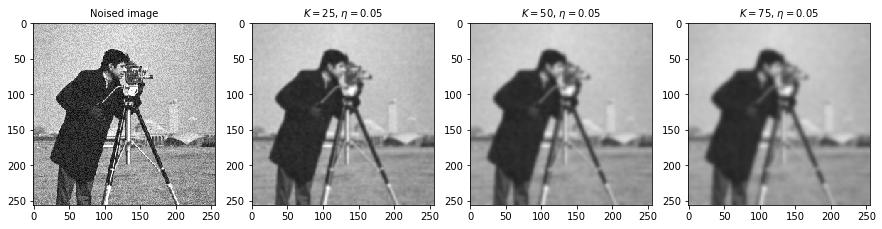

In [2]:
# eta is a size of time step in discrete scheme
eta = 0.05
K1 = 25
blurred_image_1 = heat_equation(image_noisy, eta, K1)
K2 = 50
blurred_image_2 = heat_equation(image_noisy, eta, K2)
K3 = 75
blurred_image_3 = heat_equation(image_noisy, eta, K3)

fs = 10 # fontsize for title's subplots

plt.figure(figsize=(8,8))
f, axarr = plt.subplots(1,4,figsize=(15,15))
axarr[0].imshow(image_noisy, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[0].set_title('Noised image', fontsize=fs)
axarr[1].imshow(blurred_image_1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[1].set_title('$K = {}$, $\eta={}$'.format(K1, eta), fontsize=fs)
axarr[2].imshow(blurred_image_2, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[2].set_title('$K = {}$, $\eta={}$'.format(K2, eta), fontsize=fs)
axarr[3].imshow(blurred_image_3, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[3].set_title('$K = {}$, $\eta={}$'.format(K3, eta), fontsize=fs)
plt.show()

# Edge detection by gradient thresholding

<Figure size 576x576 with 0 Axes>

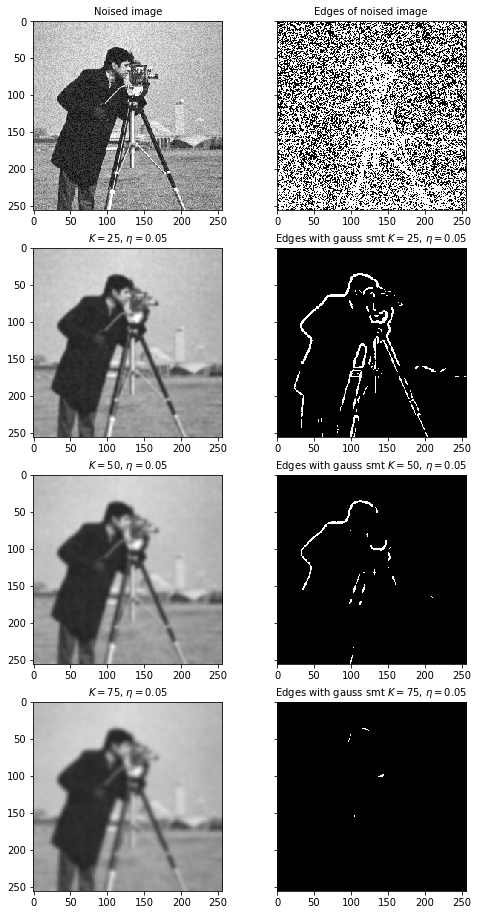

In [3]:
th = 0.1 # treshold parameter
edges_g_0 = grad_edge(image_noisy, th)
edges_g_1 = grad_edge(blurred_image_1, th)
edges_g_2 = grad_edge(blurred_image_2, th)
edges_g_3 = grad_edge(blurred_image_3, th)

plt.figure(figsize=(8,8))
f, axarr = plt.subplots(4,2,figsize=(8,16), sharey=True)
axarr[0,0].imshow(image_noisy, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[0,0].set_title('Noised image', fontsize=fs)
axarr[0,1].imshow(edges_g_0, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[0,1].set_title('Edges of noised image', fontsize=fs)

axarr[1,0].imshow(blurred_image_1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[1,0].set_title('$K = {}$, $\eta={}$'.format(K1, eta), fontsize=fs)
axarr[1,1].imshow(edges_g_1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[1,1].set_title('Edges with gauss smt $K = {}$, $\eta={}$'.format(K1, eta), fontsize=fs)

axarr[2,0].imshow(blurred_image_2, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[2,0].set_title('$K = {}$, $\eta={}$'.format(K2, eta), fontsize=fs)
axarr[2,1].imshow(edges_g_2, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[2,1].set_title('Edges with gauss smt $K = {}$, $\eta={}$'.format(K2, eta), fontsize=fs)
                     
axarr[3,0].imshow(blurred_image_3, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[3,0].set_title('$K = {}$, $\eta={}$'.format(K3, eta), fontsize=fs)
axarr[3,1].imshow(edges_g_3, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[3,1].set_title('Edges with gauss smt $K = {}$, $\eta={}$'.format(K3, eta), fontsize=fs)

plt.show()

# Edge detection using extremums of Laplacian

<Figure size 576x576 with 0 Axes>

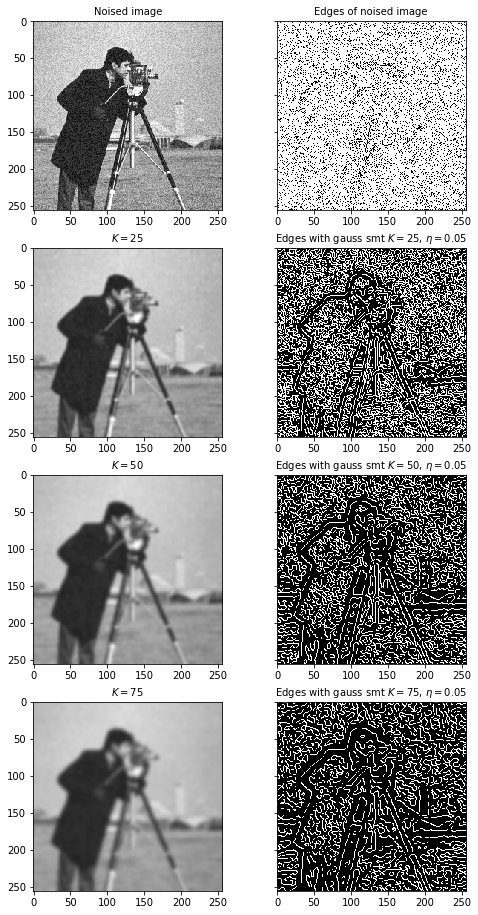

In [4]:
edges_l_0 = laplace_edge(image_noisy)
edges_l_1 = laplace_edge(blurred_image_1)
edges_l_2 = laplace_edge(blurred_image_2)
edges_l_3 = laplace_edge(blurred_image_3)

plt.figure(figsize=(8,8))
f, axarr = plt.subplots(4,2,figsize=(8,16), sharey=True)
axarr[0,0].imshow(image_noisy, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[0,0].set_title('Noised image', fontsize=fs)
axarr[0,1].imshow(edges_l_0, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[0,1].set_title('Edges of noised image', fontsize=fs)

axarr[1,0].imshow(blurred_image_1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[1,0].set_title('$K = {}$'.format(K1), fontsize=fs)
axarr[1,1].imshow(edges_l_1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[1,1].set_title('Edges with gauss smt $K = {}$, $\eta={}$'.format(K1, eta), fontsize=fs)

axarr[2,0].imshow(blurred_image_2, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[2,0].set_title('$K = {}$'.format(K2), fontsize=fs)
axarr[2,1].imshow(edges_l_2, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[2,1].set_title('Edges with gauss smt $K = {}$, $\eta={}$'.format(K2, eta), fontsize=fs)
                     
axarr[3,0].imshow(blurred_image_3, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[3,0].set_title('$K = {}$'.format(K3), fontsize=fs)
axarr[3,1].imshow(edges_l_3, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[3,1].set_title('Edges with gauss smt $K = {}$, $\eta={}$'.format(K3, eta), fontsize=fs)

plt.show()

# Marr - Hildreth edge detector

<Figure size 576x576 with 0 Axes>

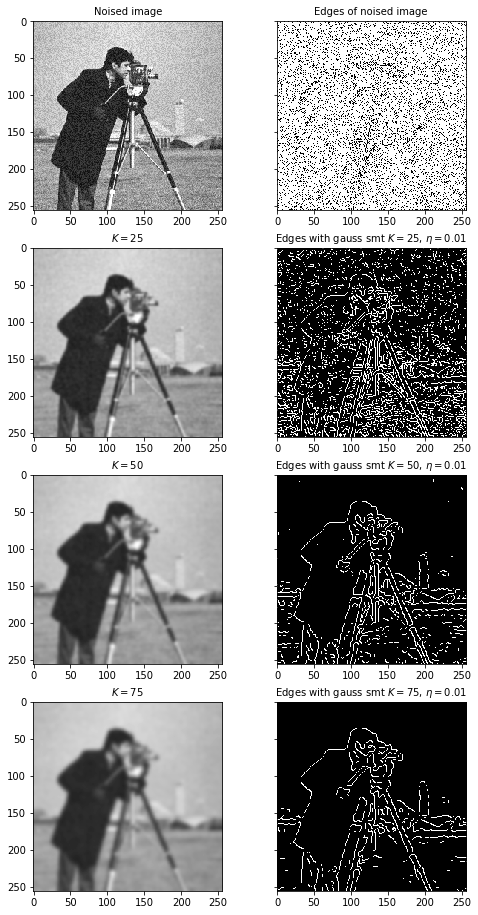

In [5]:
eta = 0.01
edges_m_0 = MarrHildreth(image_noisy, eta)
edges_m_1 = MarrHildreth(blurred_image_1, eta)
edges_m_2 = MarrHildreth(blurred_image_2, eta)
edges_m_3 = MarrHildreth(blurred_image_3, eta)

plt.figure(figsize=(8,8))
f, axarr = plt.subplots(4,2,figsize=(8,16), sharey=True)
axarr[0,0].imshow(image_noisy, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[0,0].set_title('Noised image', fontsize=fs)
axarr[0,1].imshow(edges_m_0, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[0,1].set_title('Edges of noised image', fontsize=fs)

axarr[1,0].imshow(blurred_image_1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[1,0].set_title('$K = {}$'.format(K1), fontsize=fs)
axarr[1,1].imshow(edges_m_1, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[1,1].set_title('Edges with gauss smt $K = {}$, $\eta={}$'.format(K1, eta), fontsize=fs)

axarr[2,0].imshow(blurred_image_2, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[2,0].set_title('$K = {}$'.format(K2), fontsize=fs)
axarr[2,1].imshow(edges_m_2, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[2,1].set_title('Edges with gauss smt $K = {}$, $\eta={}$'.format(K2, eta), fontsize=fs)
                     
axarr[3,0].imshow(blurred_image_3, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[3,0].set_title('$K = {}$'.format(K3), fontsize=fs)
axarr[3,1].imshow(edges_m_3, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
axarr[3,1].set_title('Edges with gauss smt $K = {}$, $\eta={}$'.format(K3, eta), fontsize=fs)

plt.show()